In [ ]:
from tool_class import Tool
f13_data = Tool.crawler('https://www.rocketfinancial.com/Holdings.aspx?fID=250')
f13_data.to_csv('lone_pine.csv', index=False)

In [8]:
import time
a = time.time()
import pandas as pd
import numpy as np

key = input('要爬蟲選1，預測投組選2: ')
if key == '1':
    from tool_class import Tool
    website = input('爬蟲網址 ex:https://www.rocketfinancial.com/Holdings.aspx?fID=250: ')
    f13_data = Tool.crawler(website)
    f13_data.to_csv('lone_pine.csv', index=False)
elif key == '2':
    import tool_class
    f13_data = pd.read_csv('lone_pine.csv')
    price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
    industry = pd.read_csv('industry2.csv')
    asset = pd.read_csv('asset and book value.csv')

    date = input('本月月份(結果為預期下個月的投組): ')
    tool = tool_class.Tool(f13_data, price_data, industry, asset, date)

    feature_data = tool.training_set()

    testing_data = tool.testing_set()

    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1

    while start + last_buy_count * 3 < len(feature_data):
        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:int(start+last_buy_count*1.5)]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        start = int(start+last_buy_count*1.5)

    t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
    x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    y = t_data[['buy']].values
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    svc_clf = tool.svc_model(x, y)
    if svc_clf is not False:
        y_pred = svc_clf.predict(x_test)
        testing_data.loc[:, 'svc'] = y_pred
        testing_data = testing_data[testing_data['svc']==1]
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    rft_clf = tool.rft_model(x, y)
    if rft_clf is not False:
        y_pred = rft_clf.predict(x_test)
        testing_data.loc[:, 'rtf'] = y_pred
        testing_data = testing_data[testing_data['rtf']==1]

    print(list(testing_data['ticker']))
    
b = time.time()
print(b-a)

要爬蟲選1，預測投組選2: 2
本月月份(結果為預期下個月的投組): 200812


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


['A', 'AAPL', 'ABT', 'ADBE', 'ADI', 'ADP', 'AEO', 'AET', 'AGN', 'ALL', 'AMD', 'AMGN', 'AMTD', 'AMX', 'AMZN', 'ATML', 'ATVI', 'AU', 'BAM', 'BAX', 'BBBY', 'BBY', 'BIDU', 'BIG', 'BIIB', 'BMY', 'BRCM', 'CAH', 'CB', 'CCL', 'CMCSA', 'CSCO', 'DD', 'DELL', 'DIS', 'DISH', 'DKS', 'DNA', 'EMC', 'GG', 'GLW', 'GPS', 'HD', 'HOG', 'HPQ', 'HRB', 'IDTI', 'INFY', 'IP', 'JNPR', 'JPM', 'KBH', 'KBR', 'KG', 'KLAC', 'KMX', 'LEG', 'LLTC', 'LRCX', 'LVS', 'MA', 'MAR', 'MAT', 'MCD', 'MCK', 'MET', 'MHS', 'MMC', 'MON', 'MRK', 'MSFT', 'NDAQ', 'NEM', 'NWL', 'OI', 'OMC', 'PAYX', 'PCL', 'PDLI', 'PETM', 'PFE', 'PGR', 'QCOM', 'QLGC', 'SCHW', 'SPIL', 'SPLS', 'T', 'TIBX', 'TIF', 'TJX', 'TSM', 'TV', 'TXN', 'UNH', 'USB', 'V', 'VRSN', 'VZ', 'WU', 'XLNX']
38.86186861991882


In [9]:
feature_data[feature_data['buy']==1]

,ticker,class,buy,volatility,liquidity,52 week high,momentum
0,AAP,0,1,279003.0,2.946457,1.845676,0.838464
1,AAPL,0,1,8441033.0,9.495670,2.482669,0.677126
2,AEO,0,1,954406.0,4.635492,3.308017,0.628291
3,AFFY,0,1,7680.0,0.501895,2.253705,0.731565
4,AMX,L,1,1580394.0,2.371504,2.824799,0.584968
5,AMZN,0,1,2284628.0,5.327560,2.747645,0.689606
6,ARRY,0,1,56930.0,1.196310,3.792570,0.677570
7,BAM,A,1,591673.0,1.026556,3.113821,0.555233
8,BAX,0,1,907314.0,1.463006,1.467010,0.921620
9,BBBY,0,1,1167245.0,4.494157,2.014560,0.794480


In [1]:
a_date = []
for i in range(200501, 201913, 1):
    i = str(i)
    if 1 <= int(i[4:]) <= 12:
        a_date.append(i)

In [6]:
a_date = a_date[9:]

In [8]:
import time
import pandas as pd
import numpy as np
import tool_class
f13_data = pd.read_csv('lone_pine.csv')
price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
industry = pd.read_csv('industry2.csv')
asset = pd.read_csv('asset and book value.csv')
our_revenue = []
lone_pine_revenue = []
error_date = []

for index in range(0, len(a_date)-1, 1):
    c = time.time()
    f13_data1 = f13_data.copy()
    price_data1 = price_data.copy()
    industry1 = industry.copy()
    asset1 = asset.copy()
    date = str(a_date[index])
    print(date)
    if int(date[4:]) == 1 or int(date[4:]) == 11:
        seanson_date = str(int(date[0:4])-1) + '12'
    elif int(date[4:]) == 4 or int(date[4:]) == 2:
        seanson_date = date[0:4] + '03'
    elif int(date[4:]) == 7 or int(date[4:]) == 5:
        seanson_date = date[0:4] + '06'
    elif int(date[4:]) == 10 or int(date[4:]) == 8:
        seanson_date = date[0:4] + '09'
    else:
        seanson_date = date
    tool = tool_class.Tool(f13_data1, price_data1, industry1, asset1, date)

    feature_data = tool.training_set()

    testing_data = tool.testing_set()

    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1
    
    try:
        while start + last_buy_count * 2 < len(feature_data):
            t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:start+last_buy_count*1]])
            x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
            y = t_data[['buy']].values
            x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
            svc_clf = tool.svc_model(x, y)
            if svc_clf is not False:
                y_pred = svc_clf.predict(x_test)
                testing_data.loc[:, 'svc'] = y_pred
                testing_data = testing_data[testing_data['svc']==1]
            x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
            rft_clf = tool.rft_model(x, y)
            if rft_clf is not False:
                y_pred = rft_clf.predict(x_test)
                testing_data.loc[:, 'rtf'] = y_pred
                testing_data = testing_data[testing_data['rtf']==1]
            start = start+last_buy_count*1

        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        print(testing_data)
        test = tool.price_data.merge(testing_data[['ticker', 'class']], left_on=['Ticker', 'Class'], right_on=['ticker', 'class'])
        our_revenue.append(sum(test[test['Date']==str(a_date[index+1])]['PRC'])/sum(test[test['Date']==date]['PRC']))


        def abcd(df_col):
            if df_col == 'A':
                return df_col
            else:
                return 0
        tdf = tool.f13_data[tool.f13_data['Date']==seanson_date][['Ticker', 'Class']]
        tdf['Class'] = tdf['Class'].apply(abcd)
        test1 = tool.price_data.merge(tdf, on=['Ticker', 'Class'])
        lone_pine_revenue.append(sum(list(test1[test1['Date']==str(a_date[index+1])]['PRC'])) / sum(list(test1[test1['Date']==date]['PRC'])))
    except:
        print(date,'no data')
        error_date.append(date)
    
    b = time.time()
    print(b-c)

200510


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

    ticker class  volatility  liquidity  52 week high  momentum  rtf
0        A     0    594601.0   1.203212      1.668137  1.268809    1
1      AAP     0    213043.0   1.946202      1.977146  0.746729    1
2     AAPL     0   6701524.0   7.980123      2.640785  1.096919    1
5     ABGX     0    577831.0   6.380925      1.938838  1.239527    1
9      ACS     A    390281.0   3.278322      1.296905  1.019746    1
13    ADSK     0    531156.0   2.301369      2.612400  1.176586    1
16    ADVS     0     51855.0   1.676311      1.915663  1.315487    1
17     AEA     A     56301.0   0.673554      2.030822  0.782282    1
19     AET     0    442141.0   1.545888      2.234432  0.905768    1
21    AFFX     0    218275.0   3.288810      1.976977  1.020798    1
22    AGEN     0    140401.0   3.079577      2.203593  0.771585    1
23     AGN     0    170106.0   1.300664      1.376864  1.118574    1
29     AMD     0   2639129.0   6.625035      1.812147  1.263625    1
30    AMGN     0   2065799.0   1.6

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

    ticker class  volatility  liquidity  52 week high  momentum  rtf
0        A     0    764144.0   1.489559      1.749510  1.272750    1
1      AAP     0    203964.0   1.885465      1.977146  0.781226    1
2     AAPL     0   4836031.0   5.738271      2.640785  1.235527    1
4     ABGX     0    895651.0   9.890576      2.096330  1.254858    1
6      ABT     0   1294902.0   0.834759      1.325643  0.888107    1
12    ADSK     0    895596.0   3.880399      2.612400  1.176123    1
14    ADTN     0    228522.0   3.002957      2.090736  1.260396    1
18    AEIS     0     99839.0   2.250096      1.952035  1.212233    1
19     AET     0    340282.0   1.189751      2.234432  0.960282    1
21    AFFX     0    137919.0   2.078064      1.745728  1.025225    1
23     AGN     0    330677.0   2.463052      1.464601  1.139275    1
25    AKAM     0    647398.0   4.259618      1.905204  1.307167    1
27    ALOY     0    138047.0   2.959461      1.977941  0.946000    1
30     AMD     0   2310494.0   5.7

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

    ticker class  volatility  liquidity  52 week high  momentum  rtf
0        A     0   1078178.0   2.101712      1.763725  1.260512    1
1      AAP     0    142271.0   1.315169      1.977146  0.839845    1
2     AAPL     0   4699521.0   5.557505      2.640785  1.359688    1
4     ABGX     0   1282758.0  14.055773      3.314985  1.670490    1
6      ABT     0   1147041.0   0.739441      1.328461  0.859674    1
9     ADLR     0     65105.0   1.664834      1.914710  1.400608    1
11    ADSK     0    486790.0   2.109142      1.725888  1.133742    1
13    ADTN     0    199192.0   2.500778      2.090736  1.204308    1
15     AEA     A     36335.0   0.441795      2.030822  0.825902    1
17     AET     0    278004.0   0.972005      2.234432  1.018178    1
19    AFFX     0    273377.0   4.066900      1.745728  1.029964    1
20    AGEN     0     67084.0   1.471431      2.100840  0.841068    1
21     AGN     0    276249.0   2.057644      1.591719  1.218706    1
24    AKAM     0    438103.0   2.8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avo

200601 no data
17.40001678466797
200602


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: 

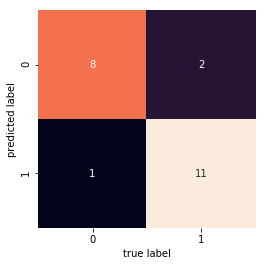

In [55]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')